In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset
file_path = '/kaggle/input/stock-data-stock-prices-csv/stock_data.stock_prices.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


                        _id symbol            timestamp        open  \
0  67684be1d5e7efabd1532871   AAPL  2023-01-03 14:30:00  130.279999   
1  67684be1d5e7efabd1532872   AAPL  2023-01-03 15:30:00  125.459999   
2  67684be1d5e7efabd1532873   AAPL  2023-01-03 16:30:00  125.350197   
3  67684be1d5e7efabd1532874   AAPL  2023-01-03 17:30:00  124.660004   
4  67684be1d5e7efabd1532875   AAPL  2023-01-03 18:30:00  124.669899   

         high         low       close    volume  is_live interval  
0  130.899994  125.230003  125.459999  27775505    False       1h  
1  125.870003  124.730003  125.345001  18104999    False       1h  
2  125.370003  124.349098  124.660004  11248777    False       1h  
3  124.940002  124.190002  124.649902   8860080    False       1h  
4  125.000000  124.190002  124.570000   8388062    False       1h  


In [3]:
# Display the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (3456, 10)


In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Display summary statistics
print("\nSummary statistics:\n", df.describe())


Missing values:
 _id          0
symbol       0
timestamp    0
open         0
high         0
low          0
close        0
volume       0
is_live      0
interval     0
dtype: int64

Data types:
 _id           object
symbol        object
timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
is_live         bool
interval      object
dtype: object

Number of duplicate rows: 0

Summary statistics:
               open         high          low        close        volume
count  3456.000000  3456.000000  3456.000000  3456.000000  3.456000e+03
mean    189.004298   189.585355   188.436863   189.041092  6.676111e+06
std      27.076887    27.130761    27.001831    27.077343  4.585792e+06
min     124.578003   124.940002   124.169998   124.570000  0.000000e+00
25%     171.847504   172.347454   171.305000   171.857502  4.007746e+06
50%     184.642502   185.099998   184.179993   184.649994  5.347993e+06
75%     213.202499   213.87

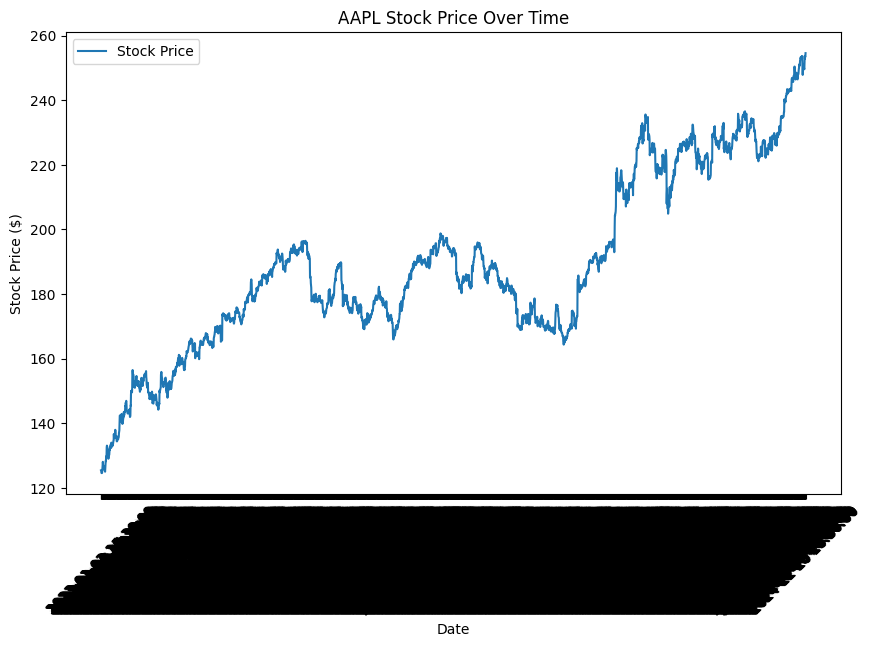

In [5]:
import matplotlib.pyplot as plt

# Plot the closing stock price
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['close'], label='Stock Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [6]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load your dataset (replace 'your_data.csv' with the actual filename)
# Ensure your dataset contains a 'Close' column for stock prices
data = pd.read_csv('/kaggle/input/stock-data-stock-prices-csv/stock_data.stock_prices.csv', index_col='timestamp', parse_dates=True)

In [7]:

# Split the data into training and testing sets (80% training, 20% testing)
split_ratio = 0.8
train_size = int(len(data) * split_ratio)
train, test = data[:train_size], data[train_size:]

# Scale the 'Close' column using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['close']])  # Only scale the 'Close' column

# Prepare the dataset for the LSTM model
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])  # Features (look_back values)
        y.append(data[i + look_back, 0])  # Target (the next value)
    return np.array(X), np.array(y)

# Define look-back window size
look_back = 60

# Create training dataset
X_train, y_train = create_dataset(train_scaled, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM input


In [8]:

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Prepare the test data
test_scaled = scaler.transform(test[['close']])  # Scale the test data
X_test, y_test = create_dataset(test_scaled, look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape for LSTM input

# Predict the stock prices
predicted_stock_price = model.predict(X_test)

# Inverse transform the predictions to original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0492
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.7039e-04
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0068e-04
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9522e-04
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3879e-04
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5185e-04
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9005e-04
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2244e-04
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9491e-04
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.5757e-04
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6175e-04
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6631e-04
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8381e-04
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1571e-04
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━

Mean Squared Error (MSE): 1.7531165691410167
Root Mean Squared Error (RMSE): 1.3240530839588784
Mean Absolute Error (MAE): 0.9274916105632531
R-squared (R2): 0.9767883825462726


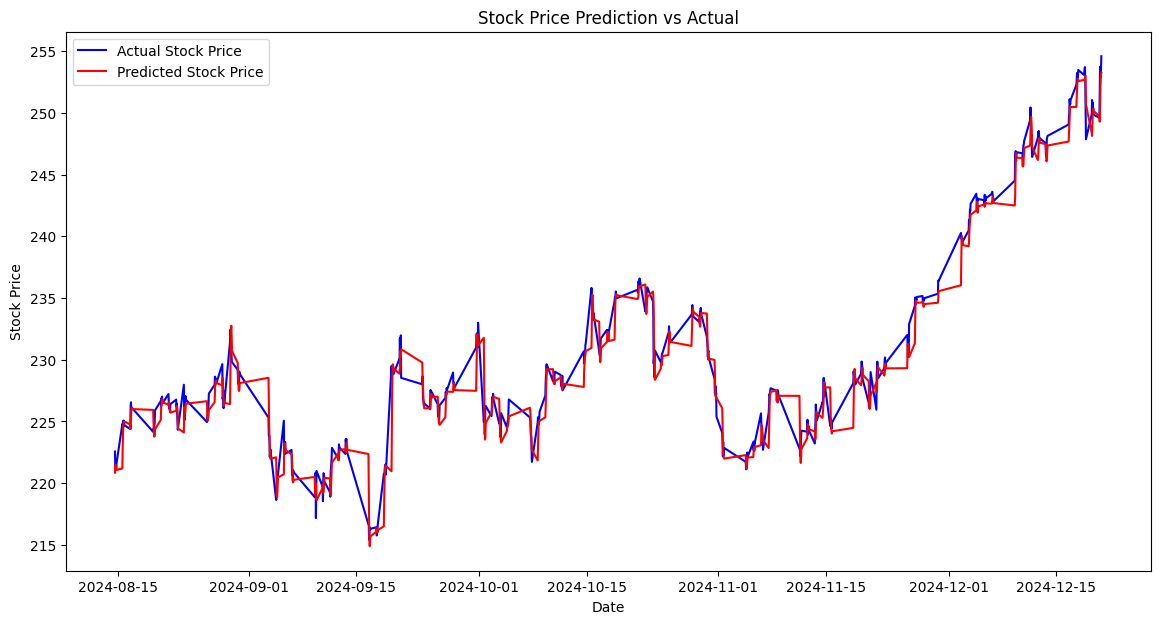

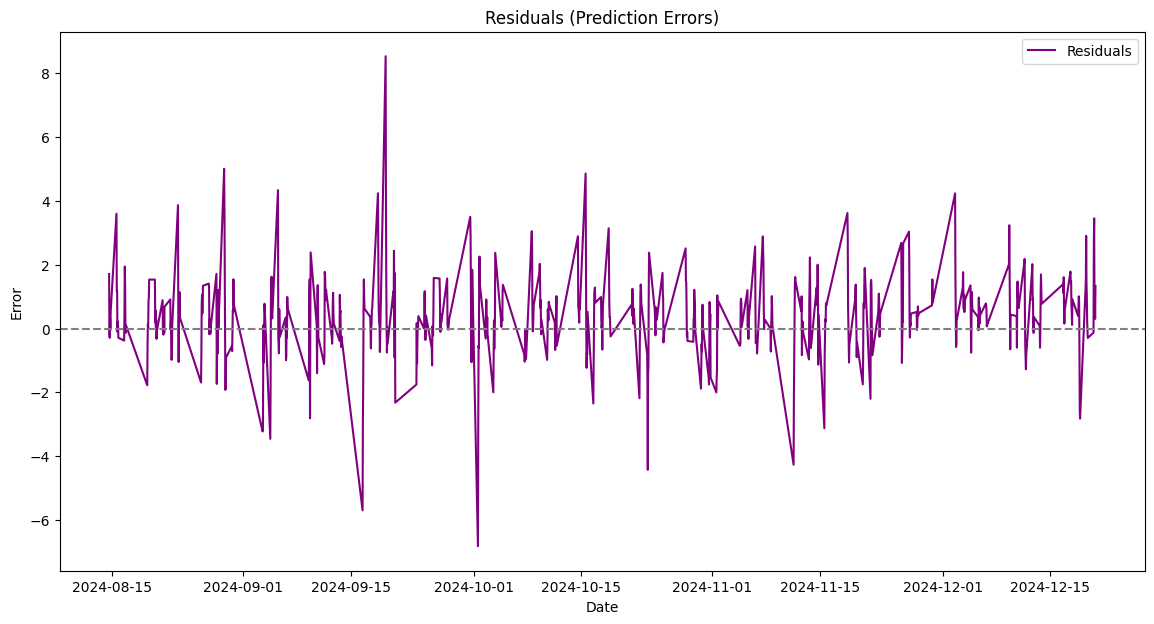

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(test['close'][look_back:], predicted_stock_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['close'][look_back:], predicted_stock_price)
r2 = r2_score(test['close'][look_back:], predicted_stock_price)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Visualize the predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(test.index[look_back:], test['close'][look_back:], color='blue', label='Actual Stock Price')
plt.plot(test.index[look_back:], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot residuals (errors)
residuals = test['close'][look_back:] - predicted_stock_price.flatten()
plt.figure(figsize=(14, 7))
plt.plot(test.index[look_back:], residuals, label='Residuals', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Residuals (Prediction Errors)')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.show()


In [12]:
import torch

# Save the trained model to .pt file
torch.save(model, 'stock_model.pt')
print("Model saved as stock_model.pt")

# Save the scaler to .pkl file
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")

# Verify the files were created
import os
print("\nSaved files:")
print(os.listdir())

Model saved as stock_model.pt
Scaler saved as scaler.pkl

Saved files:
['scaler.pkl', '.virtual_documents', 'stock_model.pt']


In [14]:
import torch
import h5py
import torch.nn as nn

# Define a Sequential model
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 1)
)

# Save the model to an h5 file
def save_sequential_model_to_h5(model, file_name='model.h5'):
    if isinstance(model, nn.Sequential):
        with h5py.File(file_name, 'w') as h5file:
            for key, value in model.state_dict().items():
                h5file.create_dataset(key, data=value.cpu().numpy())
        print(f"Sequential model saved to {file_name}")
    else:
        raise TypeError("Provided model is not a Sequential model.")

save_sequential_model_to_h5(model)


Sequential model saved to model.h5


<ipython-input-15-af9aabb73546>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pytorch_model = torch.load('stock_model.pt')


AttributeError: 'Sequential' object has no attribute 'eval'